# Data Exploration with Pandas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/titanic-train.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

In [11]:
df.describe()

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


### Indexing

In [5]:
df.iloc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [ ]:
df.loc[0:4,'Ticket']

In [ ]:
df['Ticket'].head()

In [ ]:
df[['Embarked', 'Ticket']].head()

### Selections

In [14]:
df[df['Age'] > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
df['Age'] > 70

In [ ]:
df.query("Age > 70")

In [ ]:
df[(df['Age'] == 11) & (df['SibSp'] == 5)]

In [ ]:
df[(df.Age == 11) | (df.SibSp == 5)]

In [15]:
df.query('(Age == 11) | (SibSp == 5)')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S


### Unique Values

In [ ]:
df['Embarked'].unique()

### Sorting

In [ ]:
df.sort_values('Age', ascending = False).head()

### Aggregations

In [ ]:
df['Survived'].value_counts()

In [ ]:
df['Pclass'].value_counts()

In [ ]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

In [ ]:
df['Age'].min()

In [ ]:
df['Age'].max()

In [ ]:
df['Age'].mean()

In [ ]:
df['Age'].median()

In [16]:
mean_age_by_survived = df.groupby('Survived')['Age'].mean()
mean_age_by_survived

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [ ]:
std_age_by_survived = df.groupby('Survived')['Age'].std()
std_age_by_survived

### Merge

In [ ]:
df1 = mean_age_by_survived.round(0).reset_index()
df2 = std_age_by_survived.round(0).reset_index()

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3 = pd.merge(df1, df2, on='Survived')

In [ ]:
df3

In [ ]:
df3.columns = ['Survived', 'Average Age', 'Age Standard Deviation']

In [ ]:
df3

### Pivot Tables

In [17]:
df.pivot_table(index='Pclass',
               columns='Survived',
               values='PassengerId',
               aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Correlations

In [18]:
df['IsFemale'] = df['Sex'] == 'female'

In [19]:
correlated_with_survived = df.corr()['Survived'].sort_values()
correlated_with_survived

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
IsFemale       0.543351
Survived       1.000000
Name: Survived, dtype: float64

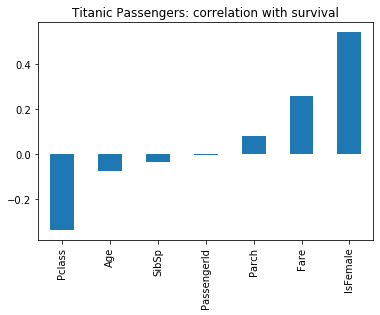

In [20]:
correlated_with_survived.iloc[:-1].plot(kind='bar',
                                        title='Titanic Passengers: correlation with survival');

# Visual Data Exploration with Matplotlib

In [ ]:
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [ ]:
data = np.vstack([data1, data2, data3, data4]).transpose()

In [ ]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()

### Line Plot

In [ ]:
df.plot(title='Line plot');

In [ ]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4']);

### Scatter Plot

In [ ]:
df.plot(style='.');

In [ ]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

### Histograms

In [ ]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

### Cumulative distribution

In [ ]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        density=True,
        cumulative=True,
        alpha=0.4);

### Box Plot

In [ ]:
df.plot(kind='box',
        title='Boxplot');

### Subplots

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot')

plt.tight_layout()

### Pie charts

In [ ]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

In [ ]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

### Hexbin plot

In [ ]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])

In [ ]:
df.head()

In [ ]:
df.plot();

In [ ]:
df.plot(kind='kde');

In [ ]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow');

# Unstructured data

### Images

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('../data/iss.jpg')
img

In [ ]:
type(img)

In [ ]:
imgarray = np.asarray(img)

In [ ]:
type(imgarray)

In [ ]:
imgarray.shape

In [ ]:
imgarray.ravel().shape

In [ ]:
435 * 640 * 3

### Sound

In [ ]:
from scipy.io import wavfile

In [ ]:
rate, snd = wavfile.read(filename='../data/sms.wav')

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=snd, rate=rate)

In [ ]:
len(snd)

In [ ]:
snd

In [ ]:
plt.plot(snd)

In [ ]:
_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

# Data Exploration Exercises

## Exercise 1
- load the dataset: `../data/international-airline-passengers.csv`
- inspect it using the `.info()` and `.head()` commands
- use the function [`pd.to_datetime()`](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) to change the column type of 'Month' to a datatime type
- set the index of df to be a datetime index using the column 'Month' and the `df.set_index()` method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

In [ ]:
import os
os.getcwd()

In [6]:

my_data = pd.read_csv('../data/international-airline-passengers.csv')

In [ ]:
my_data.info()
my_data.head()

In [ ]:
my_data['Month'] = pd.to_datetime(my_data['Month'])
my_data.head()
my_data = my_data.set_index('Month')

Text(0, 0.5, 'Thousand passengers')

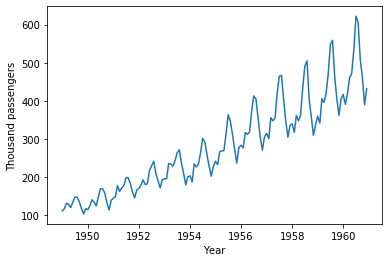

In [24]:
# plot passenger numbers per month
# scale + label axes

_, ax = plt.subplots()
ax.plot(my_data['Month'], my_data['Thousand Passengers'])
#ax.plot(my_data.index, my_data['Thousand Passengers']) # no datetime if plotted this way!
ax.set_xlabel('Year')
ax.set_ylabel('Thousand passengers')

## Exercise 2
- load the dataset: `../data/weight-height.csv`
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with 2 different colors on a new scatter plot
- remember to label the axes

In [26]:
w_height = pd.read_csv('../data/weight-height.csv')
w_height.info()
w_height.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Weight')

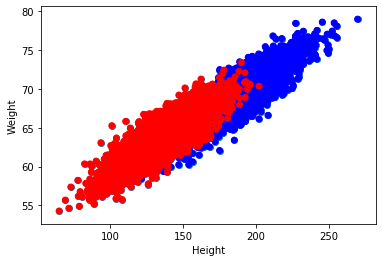

In [32]:
_, ax = plt.subplots()
ax.scatter(w_height['Weight'], w_height['Height'], vmin=0, vmax=100)

cols = ['red' if x == 'Female' else 'blue' for x in w_height['Gender']]
ax.scatter(w_height['Weight'], w_height['Height'], c=cols, vmin=0, vmax=100)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

## Exercise 3
- plot the histogram of the heights for males and for females on the same plot
- use alpha to control transparency in the plot comand
- plot a vertical line at the mean of each population using `plt.axvline()`

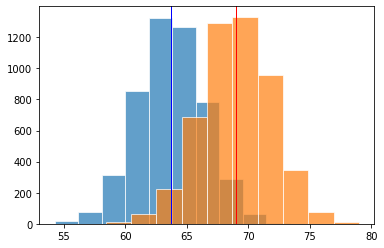

In [43]:
ax = plt.subplot()

x = w_height[w_height['Gender'] == 'Female']['Height']
y = w_height[w_height['Gender'] == 'Male']['Height']
ax.hist(x, edgecolor="white", alpha = 0.7) + ax.hist(y, edgecolor="white", alpha = 0.7)
plt.axvline(x.mean(), color='blue', linewidth=1)
plt.axvline(y.mean(), color='red', linewidth=1)

## Exercise 4
- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes and legends)

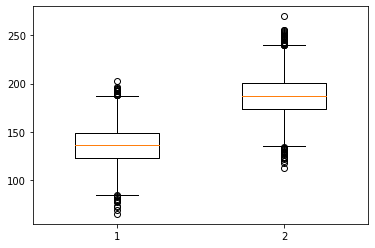

In [50]:
ax = plt.subplot()

x = w_height[w_height['Gender'] == 'Female']['Weight']
y = w_height[w_height['Gender'] == 'Male']['Weight']

ax.boxplot(x, positions=[1], widths=[0.5])
ax.boxplot(y, positions=[2], widths=[0.5])
plt.show()

## Exercise 5
- load the dataset: `../data/titanic-train.csv`
- learn about scattermatrix here: http://pandas.pydata.org/pandas-docs/stable/visualization.html
- display the data using a scattermatrix

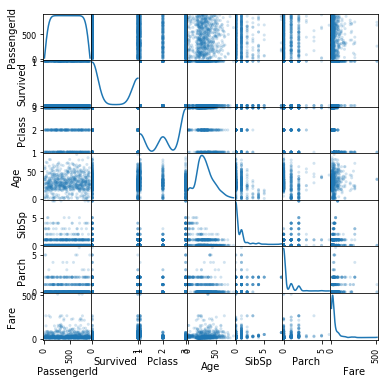

In [51]:
from pandas.plotting import scatter_matrix

df = pd.read_csv('../data/titanic-train.csv')
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde")